In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [188]:
path_model_dir = Path().cwd().parent.parent / "models"

# load df
df = pd.read_csv("5634130_rf_2022-07-26-1402-01_cnc_feat_imp.csv")
df.head()

,metric,measure,k_fold_i,"current__fft_coefficient__attr_""angle""__coeff_39","current__fft_coefficient__attr_""imag""__coeff_26","current__fft_coefficient__attr_""angle""__coeff_26","current__fft_coefficient__attr_""real""__coeff_42","current__fft_coefficient__attr_""imag""__coeff_36","current__fft_coefficient__attr_""abs""__coeff_33","current__fft_coefficient__attr_""abs""__coeff_2","current__fft_coefficient__attr_""abs""__coeff_19","current__fft_coefficient__attr_""angle""__coeff_13","current__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)"
0,accuracy,mean,0,0.021210,0.028806,0.023519,0.007435,0.001446,0.000798,0.058947,0.013992,0.039533,0.006132
1,accuracy,std,0,0.001178,0.001784,0.001082,0.000781,0.000874,0.000757,0.002051,0.000978,0.001538,0.000651
2,f1,mean,0,0.186241,0.255053,0.194564,0.107109,0.045197,0.047131,0.532365,0.242844,0.323643,0.084155
3,f1,std,0,0.009688,0.013627,0.008281,0.009482,0.010742,0.009545,0.015265,0.012621,0.008597,0.007569
4,average_precision,mean,0,0.315700,0.438028,0.263356,0.259804,0.196946,0.218637,0.811868,0.481179,0.537627,0.187150


In [189]:
# create a dict that maps the old feature names to the new feature names
feat_map = {
    'current__fft_coefficient__attr_"angle"__coeff_39': 'FFT coef. 39,\n(angle)',
    'current__fft_coefficient__attr_"imag"__coeff_26': 'FFT coef. 26,\n(imaginary)',
    'current__fft_coefficient__attr_"angle"__coeff_26': 'FFT coef. 26,\n(angle)',
    'current__fft_coefficient__attr_"real"__coeff_42': 'FFT coef. 42,\n(real)',
    'current__fft_coefficient__attr_"imag"__coeff_36': 'FFT coef. 36,\n(imaginary)',
    'current__fft_coefficient__attr_"abs"__coeff_33': 'FFT coef. 33,\n(absolute)',
    'current__fft_coefficient__attr_"abs"__coeff_2': 'FFT coef. 2,\n(absolute)',
    'current__fft_coefficient__attr_"abs"__coeff_19': 'FFT coef. 19,\n(absolute)',
    'current__fft_coefficient__attr_"angle"__coeff_13': 'FFT coef. 13,\n(angle)',
    'current__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)': 'CWT coef. 0, w=2,\nwidths=(2, 5, 10, 20)'
}

# rename the columns
df = df.rename(columns=feat_map)
df.head()

,metric,measure,k_fold_i,"FFT coef. 39,\n(angle)","FFT coef. 26,\n(imaginary)","FFT coef. 26,\n(angle)","FFT coef. 42,\n(real)","FFT coef. 36,\n(imaginary)","FFT coef. 33,\n(absolute)","FFT coef. 2,\n(absolute)","FFT coef. 19,\n(absolute)","FFT coef. 13,\n(angle)","CWT coef. 0, w=2,\nwidths=(2, 5, 10, 20)"
0,accuracy,mean,0,0.021210,0.028806,0.023519,0.007435,0.001446,0.000798,0.058947,0.013992,0.039533,0.006132
1,accuracy,std,0,0.001178,0.001784,0.001082,0.000781,0.000874,0.000757,0.002051,0.000978,0.001538,0.000651
2,f1,mean,0,0.186241,0.255053,0.194564,0.107109,0.045197,0.047131,0.532365,0.242844,0.323643,0.084155
3,f1,std,0,0.009688,0.013627,0.008281,0.009482,0.010742,0.009545,0.015265,0.012621,0.008597,0.007569
4,average_precision,mean,0,0.315700,0.438028,0.263356,0.259804,0.196946,0.218637,0.811868,0.481179,0.537627,0.187150


In [190]:
df = df[df["metric"]=="f1"].groupby(["metric", "measure"]).mean().reset_index().drop(columns=["k_fold_i", "metric", "measure"]).T.reset_index().rename(columns={"index": "feature", 0: "mean", 1: "std"}).sort_values(["mean"], ascending=False)
df.head()

,feature,mean,std
6,"FFT coef. 2,\n(absolute)",0.578920,0.015194
8,"FFT coef. 13,\n(angle)",0.393363,0.009901
7,"FFT coef. 19,\n(absolute)",0.312319,0.014338
1,"FFT coef. 26,\n(imaginary)",0.259162,0.013491
2,"FFT coef. 26,\n(angle)",0.210356,0.009613


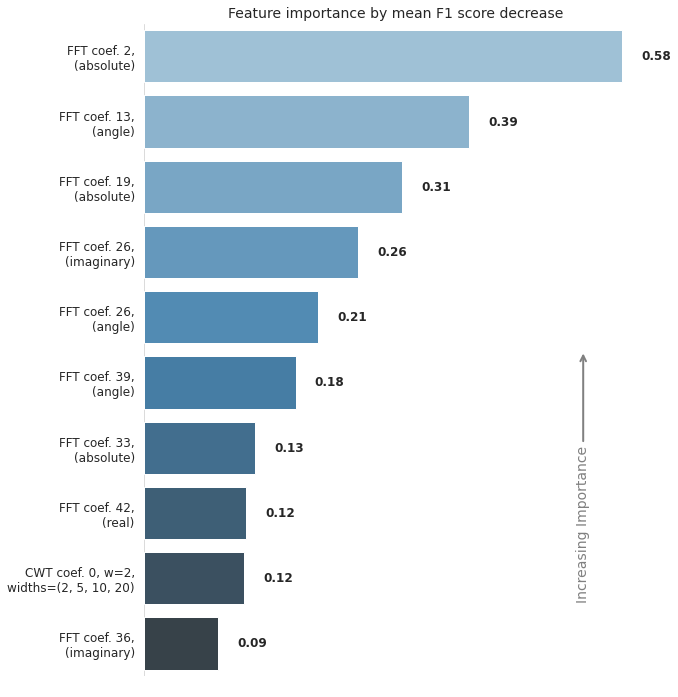

In [294]:
sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans") # proper formatting

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(9, 12),
    # dpi=150,
)



ax = sns.barplot(x="mean", y="feature", data=df, palette="Blues_d", ax=ax)

for i, p in enumerate(ax.patches):
    # help from https://stackoverflow.com/a/56780852/9214620
    if i == 0:
        space = (p.get_x() + p.get_width())*0.04
    _x = p.get_x() + p.get_width() + float(space)
    _y = p.get_y() + p.get_height() / 2
    value = p.get_width()
    ax.text(
        _x,
        _y,
        f"{value:.2}",
        ha="left",
        va="center",
        weight="semibold",
        size=12,
    )

ax.spines["bottom"].set_visible(True)
_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)
ax.set_ylabel("")
ax.set_xlabel("")

ax.annotate("Increasing Importance", xy=(0.9,0.4),  xycoords='figure fraction',
    xytext=(0.9, 0.2), textcoords='figure fraction', font="DejaVu Sans",
    arrowprops=dict(color='gray', arrowstyle='->', lw=2.0),
    horizontalalignment='center', verticalalignment='center', rotation=90, fontsize=14, color="gray")


ax.grid(alpha=0.7, linewidth=1, axis="x")
ax.set_xticks([0])
ax.set_xticklabels([], alpha=0)
ax.set_title("Feature importance by mean F1 score decrease", fontsize=14, loc="center")
# plt.subplots_adjust(wspace=0.8)
sns.despine(left=True, bottom=True)